In [172]:
import pandas as pd
import numpy as np
import math
import os
import openpyxl
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [173]:
os.listdir('D:/Tests Décathlon/data/test_data_scientist')

['bu_feat.csv.gz',
 'bu_feat.xlsx',
 'final.xlsx',
 'on_tente_des_choses.xlsx',
 'test.csv.gz',
 'test.xlsx',
 'test_predicted_turnover.xlsx',
 'train.csv',
 'train.csv.gz',
 'train.xlsx']

In [174]:
# Récupération des données pour l'entrainement
df_train=pd.read_excel('D:/Tests Décathlon/data/test_data_scientist/train.xlsx')
df_train['day_id'] = df_train['day_id'].astype(str) # On scinde la date en 3 parties (year, month et day)
df_train[["year", "month", "day"]] = df_train["day_id"].str.split("-", expand = True)
df_train_X = df_train[['year', 'month', 'day', 'but_num_business_unit', 'dpt_num_department']]
df_train_y = df_train[['turnover']]
df_train_X.head()

,year,month,day,but_num_business_unit,dpt_num_department
0,2017,09,30,64,127
1,2017,09,30,119,127
2,2017,09,30,4,88
3,2017,09,30,425,127
4,2017,09,30,513,73


In [175]:
df_train_y.head()

,turnover
0,580.308443
1,1512.995918
2,668.593556
3,0.000000
4,0.000000


In [176]:
# Récupération des données pour la prédiction
df_test=pd.read_excel('D:/Tests Décathlon/data/test_data_scientist/test.xlsx')
df_test['day_id'] = df_test['day_id'].astype(str)
df_test[["year", "month", "day"]] = df_test["day_id"].str.split("-", expand = True)
df_test = df_test[['year', 'month', 'day', 'but_num_business_unit', 'dpt_num_department']]
df_test.head()

,year,month,day,but_num_business_unit,dpt_num_department
0,2017,11,25,95,73
1,2017,11,25,4,117
2,2017,11,25,113,127
3,2017,11,25,93,117
4,2017,11,25,66,127


In [177]:
# Création des datasets d'entrainement et de test
X = np.array(df_train_X)
y = np.array(df_train_y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [178]:
# Entrainement et test du modèle
model = LinearRegression()
model.fit(X_train, y_train)
confidence = model.score(X_test, y_test)
print(confidence)

0.006570764328849066


In [179]:
# Prédiction du chiffre d'affaire
X_forecast = np.array(df_test)
forecast_set = clf.predict(X_forecast)
print(forecast_set)

[[ 223.49848426]
 [1125.53080277]
 [1254.74447927]
 ...
 [ 733.73849397]
 [ 395.92135761]
 [ -60.68097001]]


In [180]:
# Rajout des prédictions dans le dataframe df_test
df_train=pd.read_excel('D:/Tests Décathlon/data/test_data_scientist/train.xlsx')
df_test=pd.read_excel('D:/Tests Décathlon/data/test_data_scientist/test.xlsx')
df_test['turnover'] = [x[0] for x in forecast_set]
df_test.to_excel('D:/Tests Décathlon/data/test_data_scientist/test_with_predictions.xlsx')

In [181]:
# Regroupement des données en un seul fichier excel
complete_df = df_test.append(df_train, ignore_index=True)
complete_df = complete_df[['day_id', 'but_num_business_unit', 'dpt_num_department', 'turnover']]
complete_df['day_id'] = complete_df['day_id'].astype(str)
complete_df.to_excel('D:/Tests Décathlon/data/test_data_scientist/complete_data_with_predictions.xlsx')

In [183]:
print(pd.read_excel('D:/Tests Décathlon/data/test_data_scientist/train.xlsx').shape)

(277719, 4)


In [184]:
print(pd.read_excel('D:/Tests Décathlon/data/test_data_scientist/complete_data_with_predictions.xlsx').shape)

(287855, 5)


In [185]:
workbook_initial = openpyxl.load_workbook('D:/Tests Décathlon/data/test_data_scientist/train.xlsx', read_only = True)
sheet_initial = workbook_initial.active

In [186]:
# On reprend l'exemple et la méthode de la question préliminaire 1.d. avec le departement 73
data_2017_dept_73=[]
#Séléction des données utiles : lignes pour l'année 2017 du département 73
for row in sheet_initial.iter_rows(min_row = 2, max_row = 277719, values_only=True):
    if '2017' in str(row[0]) and row[2]==73:
        data_2017_dept_73.append([row[0], row[1], row[2], row[3]])
data_2017_dept_73.reverse()
date=data_2017_dept_73[0][0]
week_number=1
total_turnover=0
recap_table_2017=[]
for line in data_2017_dept_73:
    if line[0]!=date:
        recap_table_2017.append([week_number, total_turnover])
        week_number+=1
        total_turnover=0
        date=line[0]
    else:
        total_turnover+=round(float(line[3]))
recap_table_2017.append([week_number, total_turnover])
abs_2017=[]
ord_2017=[]
for i in range(len(recap_table_2017)):
    abs_2017.append(recap_table_2017[i][0])
    ord_2017.append(recap_table_2017[i][1])

In [187]:
workbook_complete = openpyxl.load_workbook('D:/Tests Décathlon/data/test_data_scientist/complete_data_with_predictions.xlsx', read_only = True)
sheet_complete = workbook_complete.active

In [188]:
# Ici on fait la même chose qu'en haut mais avec les données complètes (train + forecast)
data_2017_dept_73_forecast=[]
for row in sheet_complete.iter_rows(min_row = 2, max_row = 287855, values_only=True):
    if '2017' in str(row[1]) and row[3]==73:
        data_2017_dept_73_forecast.append([row[1], row[2], row[3], row[4]])
data_2017_dept_73_forecast.reverse()
date=data_2017_dept_73_forecast[0][0]
week_number=1
total_turnover=0
recap_table_2017_forecast=[]
for line in data_2017_dept_73_forecast:
    if line[0]!=date:
        recap_table_2017_forecast.append([week_number, total_turnover])
        week_number+=1
        total_turnover=0
        date=line[0]
    else:
        total_turnover+=round(float(line[3]))
recap_table_2017_forecast.append([week_number, total_turnover])
abs_2017_forecast=[]
ord_2017_forecast=[]
for i in range(len(recap_table_2017_forecast)):
    abs_2017_forecast.append(recap_table_2017_forecast[i][0])
    ord_2017_forecast.append(recap_table_2017_forecast[i][1])

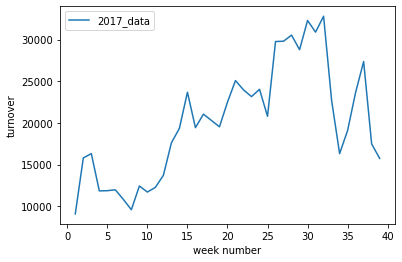

In [189]:
# Affichage du graph initial
plt.plot(abs_2017, ord_2017)
plt.legend(["2017_data"])
plt.xlabel('week number')
plt.ylabel('turnover')
plt.show()

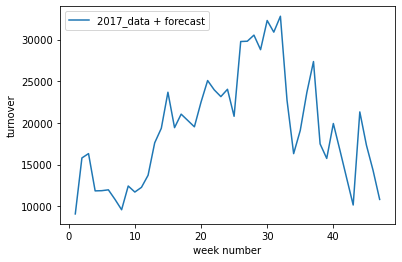

In [190]:
# Affichage du graph avec toutes les données (données initiales + données prédites)
plt.plot(abs_2017_forecast, ord_2017_forecast)
plt.legend(["2017_data + forecast"])
plt.xlabel('week number')
plt.ylabel('turnover')
plt.show()